In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data_path = '/pl/active/courses/2024_fall/ATOC_3700/data/'

In [3]:
# Example of SSP scenario dataset (replace with actual data in your case)
ssp_scenarios = {
    'SSP1-1.9': xr.open_dataset(data_path + 'Selected_hist_ssp119_daily_CMIP6_SIE_SIA.nc')['Arctic_SIE'],
    'SSP1-2.6': xr.open_dataset(data_path + 'Selected_hist_ssp126_daily_CMIP6_SIE_SIA.nc')['Arctic_SIE'],
    'SSP2-4.5': xr.open_dataset(data_path + 'Selected_hist_ssp245_daily_CMIP6_SIE_SIA.nc')['Arctic_SIE'],
    'SSP3-7.0': xr.open_dataset(data_path + 'Selected_hist_ssp370_daily_CMIP6_SIE_SIA.nc')['Arctic_SIE'],
    'SSP5-8.5': xr.open_dataset(data_path + 'Selected_hist_ssp585_daily_CMIP6_SIE_SIA.nc')['Arctic_SIE'],
}

In [4]:
# Placeholder for the time difference list
time_diff = []
time_actual= []
time_practical= []
time_diff_ssp119 = []
time_diff_ssp126 =[]
time_diff_ssp245 = []
time_diff_ssp370 = []
time_diff_ssp585 = []

years_data=np.linspace(1980,2100,44165)
# Loop through each SSP scenario
for scenario, data in ssp_scenarios.items():
    # Loop through each ensemble member
    for ensemble in np.arange(0,len(data)):
        
       # print(ensemble)
        
        # Extract the sea ice extent and time (years) from the dataset
        years = years_data  
        sea_ice_extent = data.isel(GCM=ensemble).values 
        
        # Check if sea_ice_extent is in the right shape and format
        sea_ice_extent = np.array(sea_ice_extent)
        #print(len(years))
        #print(len(sea_ice_extent))
        # Ensure time and sea ice extent have matching lengths
        if len(years) != len(sea_ice_extent):
            raise ValueError("Mismatch between years and sea ice extent lengths.")

        # Find the first year when sea ice extent is below 1 million km² (practically ice-free)
        below_1mil = np.where(sea_ice_extent < 1)[0]
        if len(below_1mil) > 0:
            practically_ice_free_year = np.int(years[below_1mil[0]])
            #print(below_1mil[0])
        else:
            continue  # If no year falls below 1 million km², skip this ensemble
        
        # Find the first year when sea ice extent reaches 0 km² (actually ice-free)
        zero_extent = np.where(sea_ice_extent == 0)[0]
        if len(zero_extent) > 0:
            actually_ice_free_year = np.int(years[zero_extent[0]])
        else:
            continue  # If no year reaches 0 km², skip this ensemble
            

        # Calculate the difference in years and add it to the list
        time_diff.append(actually_ice_free_year - practically_ice_free_year)
        time_actual.append(actually_ice_free_year)
        time_practical.append(practically_ice_free_year)
    # Assign the length of time_diff to the appropriate variable based on the scenario
    #num_ssp.append(len(time_diff))


    # Print the length of time_diff for the current scenario
    print(f"Length of time_diff for {scenario}: {len(time_diff)}")



/tmp/ipykernel_2076523/1043287325.py:34: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  practically_ice_free_year = np.int(years[below_1mil[0]])


Length of time_diff for SSP1-1.9: 0
Length of time_diff for SSP1-2.6: 0


/tmp/ipykernel_2076523/1043287325.py:42: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  actually_ice_free_year = np.int(years[zero_extent[0]])


Length of time_diff for SSP2-4.5: 67
Length of time_diff for SSP3-7.0: 153
Length of time_diff for SSP5-8.5: 230


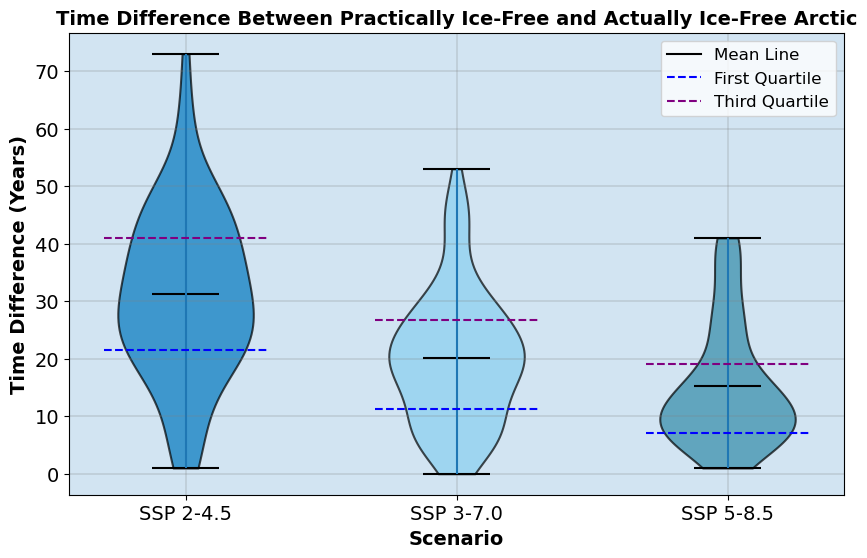

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Separate the time differences into categories
time_diff_ssp245 = time_diff[0:67]
time_diff_ssp370 = time_diff[67:153]
time_diff_ssp585 = time_diff[153:231]

# Combine the data for the violin plot
data = [time_diff_ssp245, time_diff_ssp370, time_diff_ssp585]

# Define custom arctic blue colors and ocean blue background
colors = ['#0077be', '#89CFF0', '#328BA8']  # Lighter to darker arctic blues
ocean_blue = '#D2E4F2'  # Ocean blue color

# Create the figure with a white background
fig, ax = plt.subplots(figsize=(10, 6), facecolor="white")
ax.set_facecolor(ocean_blue)  # Set plot area background color to ocean blue

# Create the violin plot without medians and with black lines
violin_parts = ax.violinplot(data, showmeans=True, showmedians=False)

# Apply colors to each violin body and set the outline color to black
for i, vp in enumerate(violin_parts['bodies']):
    vp.set_facecolor(colors[i])
    vp.set_edgecolor('black')  # Set the outline of each violin to black
    vp.set_linewidth(1.5)
    vp.set_alpha(0.7)

# Set the color of the mean lines, min, and max lines to black
for partname in ('cmeans', 'cmins', 'cmaxes'):
    if partname in violin_parts:
        violin_parts[partname].set_edgecolor('black')
        violin_parts[partname].set_linewidth(1.5)

# Add horizontal dotted lines for the first and third quartiles with labels for the legend
for i in range(len(data)):
    q1 = np.percentile(data[i], 25)  # First quartile
    q3 = np.percentile(data[i], 75)  # Third quartile
    
    # Draw short horizontal lines for each scenario
    ax.hlines(q1, i + 0.7, i + 1.3, color='blue', linestyle='--', linewidth=1.5, label='First Quartile' if i == 0 else "")  # First quartile
    ax.hlines(q3, i + 0.7, i + 1.3, color='purple', linestyle='--', linewidth=1.5, label='Third Quartile' if i == 0 else "")  # Third quartile

# Customize the x-axis with scenario labels
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['SSP 2-4.5', 'SSP 3-7.0', 'SSP 5-8.5'], fontsize=14)

# Set plot labels and title with the same size and bold style for titles
label_fontsize = 14
ax.set_title('Time Difference Between Practically Ice-Free and Actually Ice-Free Arctic', fontweight='bold', fontsize=label_fontsize)
ax.set_xlabel('Scenario', fontweight='bold', fontsize=label_fontsize)
ax.set_ylabel('Time Difference (Years)', fontweight='bold', fontsize=label_fontsize)

# Set font size of y-axis tick labels
ax.tick_params(axis='y', labelsize=14)

# Add custom legend entries
custom_legend = [
    Line2D([0], [0], color='black', linewidth=1.5, linestyle='-', label='Mean Line'),
    Line2D([0], [0], color='blue', linewidth=1.5, linestyle='--', label='First Quartile'),
    Line2D([0], [0], color='purple', linewidth=1.5, linestyle='--', label='Third Quartile')
]

# Add grid and legend
ax.grid(color='gray', linestyle='-', linewidth=0.3)
ax.legend(handles=custom_legend, loc='upper right', fontsize=12)

plt.savefig('FinalViolin1.png', dpi=600)
plt.savefig('FinalViolin1.pdf')

plt.show()